# What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

### Question 1

In [5]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [3]:
import numpy as np

In [9]:
input_mat = np.array([[[1,1,0,0,0],[0,1,0,2,0],[2,2,1,1,0],[0,0,1,2,0],[0,0,0,0,0]],[[0,0,2,1,0],[0,2,1,0,0],[0,1,0,0,0],[2,1,0,1,0],[0,0,0,0,0]],[[1,2,0,2,0],[2,0,2,2,0],[2,2,2,1,0],[1,1,0,2,0],[0,0,0,0,0]]])
filter_mat1 = np.array([[[0,-1],[-1,0]],[[0,1],[1,1]],[[1,1],[1,1]]])
filter_mat2 = np.array([[[-1,-1],[-1,1]],[[-1,-1],[1,-1]],[[0,1],[1,0]]])
filter_mat3 = np.array([[[-1,-1],[-1,1]],[[-1,-1],[1,-1]],[[0,1],[1,0]]])
bias = np.array([1,0,1])
weight = np.array([filter_mat1,filter_mat2, filter_mat3])
row_stride = 2
col_stride = 2

In [10]:
weight.shape

(3, 3, 2, 2)

In [142]:
def convolutional(input_mat, weight, bias, row_stride, col_stride):
    xinp = np.shape(input_mat)[0]
    yinp = np.shape(input_mat)[1]
    zinp = np.shape(input_mat)[2]
    ww = np.shape(weight)[0]
    xw = np.shape(weight)[1]
    yw = np.shape(weight)[2]
    zw = np.shape(weight)[3]
    print("ww ",ww)
    print("yw ",yw)
    print("zw ",zw)
    print("xinp ",xinp)
    print("yinp ",yinp)
    print("zinp ",zinp)
    yr = list(range(0, yinp-yw+1, row_stride))
    zr = list(range(0, zinp-zw+1, col_stride))
    print("yr ",yr)
    print("zr ",zr)
    output_final = np.zeros((ww , len(yr), len(zr)))
    for w in list(range(0, ww, 1)):
        output = np.zeros((len(yr), len(zr)))
        for k in list(range(0, xinp, 1)):
            s = np.zeros((len(yr), len(zr)))
            for i in yr:
                for j in zr:
                    s[int(i/row_stride)][int(j/col_stride)] = (input_mat[k][i:(i+yw),j:(j+zw)] * weight[w][k]).sum()
            output = output + s  
        output = output + (np.ones((len(yr),len(zr))) * bias[w])
        output_final[w] = output
    return output_final

In [143]:
convolutional(input_mat, weight, bias, row_stride, col_stride)

ww  3
yw  2
zw  2
xinp  3
yinp  5
zinp  5
yr  [0, 2]
zr  [0, 2]


array([[[ 7.,  9.],
        [ 9.,  5.]],

       [[ 1.,  4.],
        [-1., -1.]],

       [[ 2.,  5.],
        [ 0.,  0.]]])

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

In [125]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [36]:
def maxpool(image_mt,n):
    xinp = np.shape(image_mt)[0]
    yinp = np.shape(image_mt)[1]
    zinp = np.shape(image_mt)[2]
    yr = list(range(0,yinp,n))
    zr = list(range(0,zinp,n))
    output = np.zeros((xinp,int(yinp/n),int(zinp/n)))
    for k in list(range(0,xinp,1)):
        for i in yr:
            for j in zr:
                output[k][int(i/n)][int(j/n)] = np.max(image_mt[k][i:i+n,j:j+n])
    return output            

In [37]:
 a = np.array([[4,6,1,3],[0,8,12,9],[2,3,16,100],[1,46,74,27]])

In [38]:
a = a.reshape(1,4,4)

In [39]:
maxpool(a,2)

array([[[   8.,   12.],
        [  46.,  100.]]])

### Question 2

In [40]:
# Write a function which does the average convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [41]:
def avgpool(image_mt,n):
    xinp = np.shape(image_mt)[0]
    yinp = np.shape(image_mt)[1]
    zinp = np.shape(image_mt)[2]
    yr = list(range(0,yinp,n))
    zr = list(range(0,zinp,n))
    output = np.zeros((xinp,int(yinp/n),int(zinp/n)))
    for k in list(range(0,xinp,1)):
        for i in yr:
            for j in zr:
                output[k][int(i/n)][int(j/n)] = np.average(image_mt[k][i:i+n,j:j+n])
    return output   

In [42]:
avgpool(a,2)

array([[[  4.5 ,   6.25],
        [ 13.  ,  54.25]]])

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [1]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

Using TensorFlow backend.


### Display the image

In [2]:
image = cv2.imread('beer.png') # Please load different Images to explore 

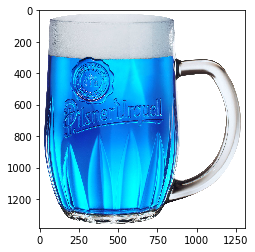

In [3]:
plt.imshow(image)

In [4]:
# what does the image look like?
image.shape

(1384, 1310, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - 

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [5]:
model = Sequential()
model.add(Convolution2D(3,    # number of ____________
                        (3,    # ___________ dimension of kernel 
                        3),    # ___________ dimension of kernel
                        input_shape=image.shape))

In [6]:
image_batch = np.expand_dims(image,axis=0)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer -

In [7]:
image_batch.shape

(1, 1384, 1310, 3)

In [8]:
conv_image = model.predict(image_batch)

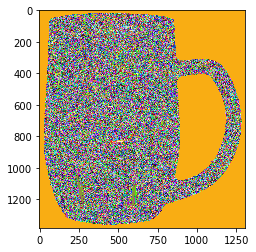

In [9]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [10]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(1382, 1308, 3)


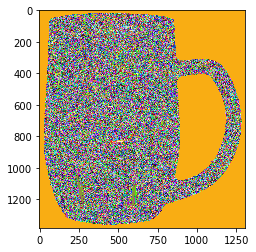

In [11]:
visualize_image(model,image)

In [12]:
image.shape

(1384, 1310, 3)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

## 10x10 Kernel Convimage

(1375, 1301, 3)


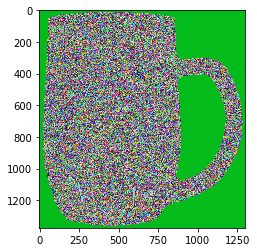

In [13]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - 

### Question 2

### What is the reason behing this difference ?

Answer -

# Play around with code below, to enhance your understading

## Another image Vis 

In [14]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [15]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

(1382, 1308, 1)
(1382, 1308)


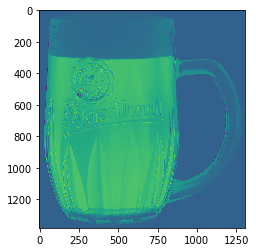

In [21]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer

## Increase the kernal size

(1370, 1296, 1)
(1370, 1296)


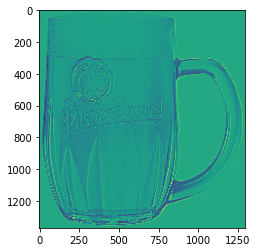

In [22]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [23]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



(1382, 1308, 1)
(1382, 1308)


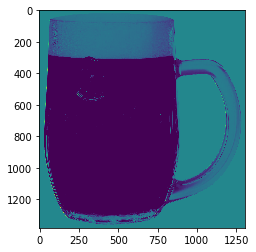

In [24]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

(276, 261, 3)


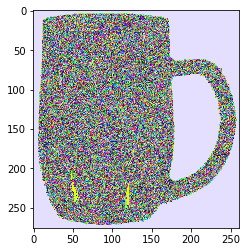

In [25]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)